# Instructions

Today you're going to practice working in Pandas. 


You'll walk through instantiating a `DataFrame`, reading data into it, looking at and examining that data, and then playing with it. 



We'll be using the data in the `data` folder located within this directory (it's the same wine data that we looked at during lecture). 


Typically, we use IPython notebooks like this for a very specific set of things - presentations and EDA. 


Today, as we'll be playing around with `Pandas`, much of what we'll be doing is considered EDA. Therefore, by using a notebook, we'll get a tighter feedback loop with our work than we would trying to write a script. But, in general, **we do not use IPython notebooks for development**. 

Below, we've put a set of questions and then a cell for you to work on answers. However, feel free to add additional cells if you'd like. Often it will make sense to use more than one cell for your answers. 

# Assignment Questions 

### Part 1 - The Basics of DataFrames

Let's start off by following the general workflow that we use when moving data into a DataFrame: 

    * Importing Pandas
    * Reading data into the DataFrame
    * Getting a general sense of the data

So, in terms of what you should do for this part...

1. Import pandas
2. Read the wine data into a DataFrame. 
3. Use the `attributes` and `methods` available on DataFrames to answer the following questions: 
    * How many rows and columns are in the DataFrame?
    * What data type is in each column?
    * Are all of the variables continuous, or are any categorical?
    * How many non-null values are in each column?
    * What are the min, mean, max, median for all numeric columns?

In [95]:
import pandas as pd # I haven't actually done this in code yet. 
df = pd.read_csv('data/winequality-red.csv', delimiter=';')

df.shape # rows und column zahl
df.info() # allgemeine infos
cols = df.columns.tolist() #adds columns to new list
cols = [col.replace(' ', '_') for col in cols] #replaces spaces in column list with underscores
df.columns = cols # replaces old columns with new column list
df.describe() # gibt rudimentäre statistiken aus für jede column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Part 2 - Practice with Grabbing Data

Let's now get some practice with grabbing certain parts of the data. If you'd like some extra practice, try answering each of the questions in more than one way (because remember, we can often grab our data in a couple of different ways). 

1. Grab the first 10 rows of the `chlorides` column. 
2. Grab the last 10 rows of the `chlorides` column. 
3. Grab indices 264-282 of the `chlorides` **and** `density` columns. 
4. Grab all rows where the `chlorides` value is less than 0.10. 
5. Now grab all the rows where the `chlorides` value is greater than the column's mean (try **not** to use a hard-coded value for the mean, but instead a method).
6. Grab all those rows where the `pH` is greater than 3.0 and less than 3.5. 
7. Further filter the results from 6 to grab only those rows that have a `residual sugar` less than 2.0. 

In [56]:
df.loc[(len(df)-10):(len(df)),"chlorides"] # lastb

1589    0.073
1590    0.077
1591    0.089
1592    0.076
1593    0.068
1594    0.090
1595    0.062
1596    0.076
1597    0.075
1598    0.067
Name: chlorides, dtype: float64

In [65]:
df2=df[["chlorides","density"]].tail(10) #tail von subframe chlorides und density, doppelklammer für mehrere columns
df.volatile_acidity.tail(10)

1589    0.725
1590    0.550
1591    0.740
1592    0.510
1593    0.620
1594    0.600
1595    0.550
1596    0.510
1597    0.645
1598    0.310
Name: volatile_acidity, dtype: float64

In [45]:
df.query("chlorides <= 0.1 and quality == 5")

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


In [70]:
print(df.chlorides.mean())
df[df['chlorides'] > df.chlorides.mean()]

0.08746654158849257


UndefinedVariableError: name 'df' is not defined

In [71]:
df.query("pH > 3 and pH < 3.5")

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.60,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1596,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [73]:
df.query("pH > 3 and pH < 3.5 and residual_sugar < 2")

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,5
13,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1569,6.2,0.51,0.14,1.9,0.056,15.0,34.0,0.99396,3.48,0.57,11.5,6
1576,8.0,0.30,0.63,1.6,0.081,16.0,29.0,0.99588,3.30,0.78,10.8,6
1578,6.8,0.67,0.15,1.8,0.118,13.0,20.0,0.99540,3.42,0.67,11.3,6
1590,6.3,0.55,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6


### Part 3 - More Practice

Let's move on to some more complicated things. Use your knowledge of `groupby`s, `sorting`, and the other things that you learned in lecture to answer the following. 

1. Get the average amount of `chlorides` for each `quality` value.

In [90]:
df_grouped_ = df.groupby("quality")
df_grouped.chlorides.mean()

NameError: name 'shape' is not defined

2. For observations with a `pH` greater than 3.0 and less than 4.0, find the average `alcohol` value by `pH`. 

In [98]:
print(len(df.query("pH > 3 and pH < 4")))
df_g_ph = df.query("pH > 3 and pH < 4").groupby("pH")
df_g_ph["alcohol"].mean()

1562


pH
3.01    11.320000
3.02    10.200000
3.03     9.633333
3.04     9.740000
3.05    10.050000
          ...    
3.74    11.500000
3.75    10.500000
3.78    12.400000
3.85    12.900000
3.90    12.950000
Name: alcohol, Length: 75, dtype: float64

3. For observations with an `alcohol` value between 9.25 and 9.5, find the highest amount of `residual sugar`. 

In [105]:
df[(df["alcohol"] >= 9.25) & (df["alcohol"] <= 9.5)].sort_values("residual_sugar", ascending=False)["residual_sugar"]

33      10.7
595      7.9
163      7.3
164      7.2
274      7.0
        ... 
25       1.4
1338     1.4
1337     1.4
1253     1.4
428      1.3
Name: residual_sugar, Length: 302, dtype: float64

In [106]:
df[(df["alcohol"] >= 9.25) & (df["alcohol"] <= 9.5)].residual_sugar.max()

10.7

4. Create a new column, called `total_acidity`, that is the sum of `fixed acidity` and `volatile acidity`. 

In [110]:
df.eval("total_acidty = fixed_acidity + volatile_acidity", inplace = True)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,total_acidty
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,8.56
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11.48
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10


5. Find the average `total_acidity` for each of the `quality` values.

In [115]:
df_g_qual_n = df.groupby("quality")
df_g_qual_n.total_acidty.mean()

quality
3    9.244500
4    8.473208
5    8.744295
6    8.844663
7    9.276281
8    8.990000
Name: total_acidty, dtype: float64

 
6. Find the top 5 `density` values. 

In [118]:
df.sort_values("density", ascending=False).density.head(5)

1434    1.00369
1435    1.00369
442     1.00320
554     1.00315
555     1.00315
Name: density, dtype: float64

7. Find the 10 lowest `sulphates` values. 

In [119]:
df.sort_values("sulphates").sulphates.head(10)

170     0.33
1369    0.37
1287    0.37
1347    0.39
1348    0.39
65      0.39
837     0.39
64      0.39
836     0.39
1237    0.40
Name: sulphates, dtype: float64

### Part 4 - Practice with Plotting 

1. Plot the average amount of `chlorides` for each `quality` value (1 from Part 3). 

Text(0.5, 1.0, 'Here is a Title')

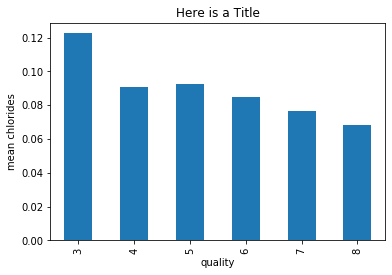

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline

df_grouped_ = df.groupby("quality")
df_grouped.chlorides.mean()
to_graph = df_grouped.chlorides.mean()
to_graph.plot(kind="bar")
plt.ylabel("mean chlorides")
plt.title("Here is a Title")


In [147]:
df_grouped.chlorides.mean()

quality
3    0.122500
4    0.090679
5    0.092736
6    0.084956
7    0.076588
8    0.068444
Name: chlorides, dtype: float64

2. Plot the `alcohol` values against `pH` values. Does there appear to be any relationship between the two?

Text(0.5, 0, 'alcohol')

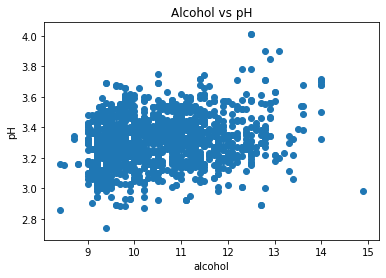

In [148]:
plt.scatter(df.alcohol, df.pH)
plt.title("Alcohol vs pH")
plt.ylabel("pH")
plt.xlabel("alcohol")


3. Plot `total_acidity` values against `pH` values. Does there appear to be any relationship between the two?

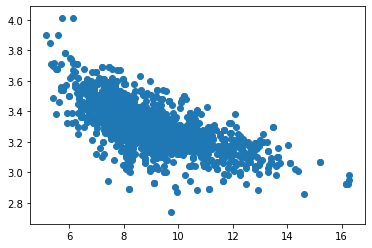

In [149]:
plt.scatter(df.total_acidty, df.pH)

4. Plot a histogram of the `quality` values. Are they evenly distributed within the data set?

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

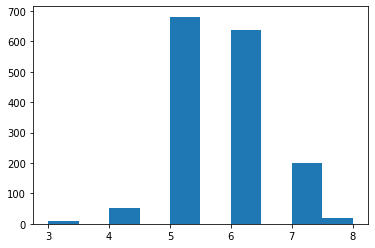

In [150]:
plt.hist(df.quality)

5. Plot a boxplot to look at the distribution of `citric acid`. 

{'whiskers': [<matplotlib.lines.Line2D at 0x122504f90>,
 'caps': [<matplotlib.lines.Line2D at 0x12250ca10>,
 'boxes': [<matplotlib.lines.Line2D at 0x122504310>],
 'medians': [<matplotlib.lines.Line2D at 0x1224e22d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x122513990>],
 'means': []}

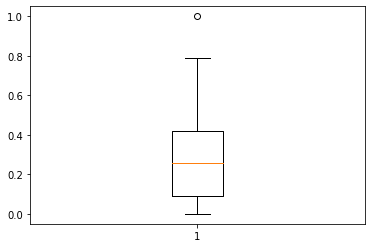

In [151]:
plt.boxplot(df.citric_acid)

### Part 5 - Putting it All Together 

Now that you've worked on all the basics with one data set, it's time to do it with a second! This time, though, you'll go through the process of downloading the data set yourself. You'll also go through the process of learning to ask questions of the data (i.e. you won't be given any questions). We'll point you to a number of different data sets, and let you go at it. In reality, this is often how data science works. There isn't a clear-cut set of instructions on what to do - you kind of just dive into the data and see what you find!

Your goal by the end of `Part 5` is to be able to tell a story with your data. Whether that means you query it and find something interesting, examine a number of different columns and their values, or plot a couple of different columns, it doesn't matter. You should aim to find at least one piece of interesting information in your data (and ideally even more than one). Then, tell your peers and the instructors what you've found! 

Potential data sources: 

1. [Forest-fires](http://archive.ics.uci.edu/ml/datasets/Forest+Fires)
2. [Iris](http://archive.ics.uci.edu/ml/datasets/Iris)
3. [Another wine data set](http://archive.ics.uci.edu/ml/datasets/Wine)
4. [Abalone](http://archive.ics.uci.edu/ml/datasets/Abalone)
5. [Adult Income data set](http://archive.ics.uci.edu/ml/datasets/Adult)

The links above are all to the home pages of these data sources. At the top of these pages, you will find a link the the `Data Folder` where you can actually find the data. The majority of these data sets don't come in `.csv` format. While one of the datasets is available in `.csv` format, we encourage you to pick whatever data set you find most interesting (regardless of the format), and challenge yourself to read the necessary documentation and go through the process of figuring out how to get the data from the web and into a `DataFrame` (the instructors will also be around to help).